<a href="https://colab.research.google.com/github/Ebasurtos/MISTI/blob/main/eda_iron_ore_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Final Project

This is a Exploratory Data Analysis Project analysing the 'Quality Prediction in a Mining Process' dataset provided by user [EduardoMagalhãesOliveira on Kaggle](https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process).

The data comes from a flotation plant, which is a common process used to concentrate iron ore.

The key objective of the analysis is to determine if we can predict the concentration of silica impurity of the ore concetrate (% Silica Concentrate).


# 1. Loading modules, examining & wrangling dataset

We start by importing the necessary DA libraries and loading our data. After a preliminary examination of the data, we'll deal with null values, and group our variables by data type if necessary.

In [1]:
# Importing libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [8]:
# Importing data
df = pd.read_csv("/content/MiningProcess_Flotation_Plant_Database.csv", decimal=',')

# Examining the content of the data
df.head(5)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


Our data contains information about the date and time when the data was captured at the flotation plant, some information about the purity, flow and pH of the ore feed, as well as data on the flotation columns.

Ultimately, the %Iron Concentrate and the %Silica Concentrate columns contain the outcomes we are interested in.

More information about the columns and the unit measurements can be found in the metadata:

* Date: Date and Timestamp

* % Iron Feed: % of Iron that comes from the iron ore that is being fed into the flotation cells

* % Silica Feed: % of silica (impurity) that comes from the iron ore that is being fed into the flotation cells

* Starch Flow: Starch (reagent) Flow measured in m3/h

* Amina Flow: Amina (reagent) Flow measured in m3/h

* Ore Pulp Flow: t/h

* Ore Pulp pH: pH scale from 0 to 14

* Ore Pulp Density: Density scale from 1 to 3 kg/cm³

* Flotation Column 01-07 Air Flow: Air flow that goes into the flotation cell measured in Nm³/h

* Flotation Column 01-07 Level: Froth level in the flotation cell measured in mm (millimeters)

* % Iron Concentrate: % of Iron which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

* % Silica Concentrate: % of silica which represents how much iron is presented in the end of the flotation process (0-100%, lab measurement)

In [9]:
# Checking data for any null values
count_null = df.isnull().sum()
print(count_null)

date                            0
% Iron Feed                     1
% Silica Feed                   1
Starch Flow                     1
Amina Flow                      1
Ore Pulp Flow                   1
Ore Pulp pH                     1
Ore Pulp Density                1
Flotation Column 01 Air Flow    1
Flotation Column 02 Air Flow    1
Flotation Column 03 Air Flow    1
Flotation Column 04 Air Flow    1
Flotation Column 05 Air Flow    1
Flotation Column 06 Air Flow    1
Flotation Column 07 Air Flow    1
Flotation Column 01 Level       1
Flotation Column 02 Level       1
Flotation Column 03 Level       1
Flotation Column 04 Level       1
Flotation Column 05 Level       1
Flotation Column 06 Level       1
Flotation Column 07 Level       1
% Iron Concentrate              1
% Silica Concentrate            1
dtype: int64


No null values found.

In [33]:
# Check for duplicate rows
count_dup = df.duplicated(keep=False).sum()
print(count_dup)

0


In [34]:
# Duplicate rows found. Remove the duplicates
df = df.drop_duplicates()

In [37]:
# Now let's study the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93439 entries, 0 to 93439
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          93439 non-null  datetime64[ns]
 1   % Iron Feed                   93438 non-null  float64       
 2   % Silica Feed                 93438 non-null  float64       
 3   Starch Flow                   93438 non-null  float64       
 4   Amina Flow                    93438 non-null  float64       
 5   Ore Pulp Flow                 93438 non-null  float64       
 6   Ore Pulp pH                   93438 non-null  float64       
 7   Ore Pulp Density              93438 non-null  float64       
 8   Average Air Flow              93438 non-null  float64       
 9   Average Froth Level           93438 non-null  float64       
 10  Flotation Column 01 Air Flow  93438 non-null  float64       
 11  Flotation Column 02 Air Flow  934

 From the initial examination of the data,a few things stand out to our attention:

*   We have nearly 736,282 unique rows and 24 columns. All values are numerical. For ease of analysis, we can use the average of the 'Flotation Column Air Flow' columns and 'Flotation Column Level' columns to conduct our analysis.
*  'Date' column is listed as object. We can update the column as a 'datetime' datatype.

In [13]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check if 'date' column has converted
df['date'].info()

<class 'pandas.core.series.Series'>
Index: 93439 entries, 0 to 93439
Series name: date
Non-Null Count  Dtype         
--------------  -----         
93439 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [14]:
# Create list for Air Flow and Froth Level columns

air_flow = df[['Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow', 'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow', 'Flotation Column 07 Air Flow']]
froth_lvl = df[['Flotation Column 01 Level', 'Flotation Column 02 Level', 'Flotation Column 03 Level', 'Flotation Column 04 Level', 'Flotation Column 05 Level', 'Flotation Column 06 Level', 'Flotation Column 07 Level']]

# Calculate the average of Air Flow columns. round to 2 decimal places
df['Average Air Flow'] = air_flow.mean(axis=1).round(2)

# Calculate the average of Froth Level columns. round to 2 decimal plcaes
df['Average Froth Level'] = froth_lvl.mean(axis=1).round(2)

# Rearrange the newly created columns to the position of the columns they're meant to replace
df.insert(8, 'Average Air Flow', df.pop('Average Air Flow'))
df.insert(9, 'Average Froth Level', df.pop('Average Froth Level'))

# Create a new working dataframe, without every column air flow and column froth level
col_to_drop = air_flow + froth_lvl
df2 = df.drop(columns=col_to_drop)
df2.head(5)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Average Air Flow,Average Froth Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,265.09,461.55,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,264.53,457.55,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,264.12,456.47,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,265.36,448.06,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,264.66,448.78,66.91,1.31


Our data is prepped. We're ready to carry out the first step of our analysis.

# 2. Univariate Analysis

Starting off with a univariate analysis, we can examine the measures of central tendencies and the measures of variance for each variable. We can use the methods of univariate analysis to check for general trends in the data and for any unusual data points.


Knowing our objective is to predict the impurity of the iron ore, it is worth paying special attention to the % Silica Concentrate variable.

In [15]:
# Start by describing the columns to get overview on the central tendencies of the dataset

df2.describe()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Average Air Flow,Average Froth Level,% Iron Concentrate,% Silica Concentrate
count,93439,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000,93438.000000
mean,2017-03-30 06:50:23.392801536,57.291006,12.718604,2352.798624,476.929284,399.463642,9.575422,1.706546,259.759222,547.948469,65.255801,2.427306
min,2017-03-10 01:00:00,50.920000,8.240000,0.013230,241.740000,376.260000,8.753340,1.519830,220.440000,294.110000,62.050000,0.770000
25%,2017-03-15 10:00:00,55.990000,9.560000,1882.997500,425.398750,396.808000,9.362973,1.688413,263.470000,509.080000,64.350000,1.570000
50%,2017-04-03 02:00:00,57.010000,12.910000,2232.620000,504.578000,399.839000,9.586085,1.740000,264.300000,550.520000,65.380000,2.130000
75%,2017-04-08 12:00:00,59.160000,14.260000,2848.827500,546.591000,402.748000,9.784355,1.760560,264.780000,590.450000,66.170000,3.110000
max,2017-04-13 22:00:00,61.380000,21.670000,6250.000000,716.184000,418.628000,10.798900,1.853100,309.410000,743.570000,67.600000,5.500000
std,NaN,2.219167,3.232163,1058.842003,87.511927,6.188884,0.309046,0.082272,9.676750,64.889737,1.128694,1.099875


In [16]:
# Take a closer look into the % Silica Concentrate column data
# Define the outlier range
# Calculate Q1 and Q3
Q1 = np.percentile(df2['% Silica Concentrate'], 25)
Q3 = np.percentile(df2['% Silica Concentrate'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Find lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in Silica Concentrate
outliers = df2[(df2['% Silica Concentrate'] < lower_bound) | (df2['% Silica Concentrate'] > upper_bound)]

# Display outliers
print("Outliers in % Silica Concentrate:")
print(outliers['% Silica Concentrate'])

print("***********")

print("Lower & Upper bound:")
print(lower_bound)
print(upper_bound)

Outliers in % Silica Concentrate:
Series([], Name: % Silica Concentrate, dtype: float64)
***********
Lower & Upper bound:
nan
nan


**Insights:**

So we have a rough idea on the central tendencies of the dataset. Some columns like Stach Flow, Amina Flow, Average Column Air Flow and Average Froth Level show a large standard deviation, indicating more widely-distributed datapoints.

Starch low, Amina Flow, and Average Froth Level in particular, seem to have a few outliers. We will need to investigate these two columns a bit more to understand why these outliers exist.


In [17]:
# Let's start with some histograms using plotly, to examine the frequency distribution of Ore Pulp pH and Ore Pulp Density

fig_hist = px.histogram(df2, x='Ore Pulp pH', title='Frequency Distribution of Ore Pulp pH', nbins=100)  # Adjust nbins as needed
fig_hist.show()

fig_hist = px.histogram(df2, x='Ore Pulp Density', title='Frequency Distribution of Ore Pulp Density', nbins=100)  # Adjust nbins as needed
fig_hist.show()


**Insights:**

* Ore Pulp pH - seems to have a normal distribution, with pH clustering around pH 9.0 - 10.0.
* Ore Pulp Density - data points fall within the 1.52 or 1.71 clusters.



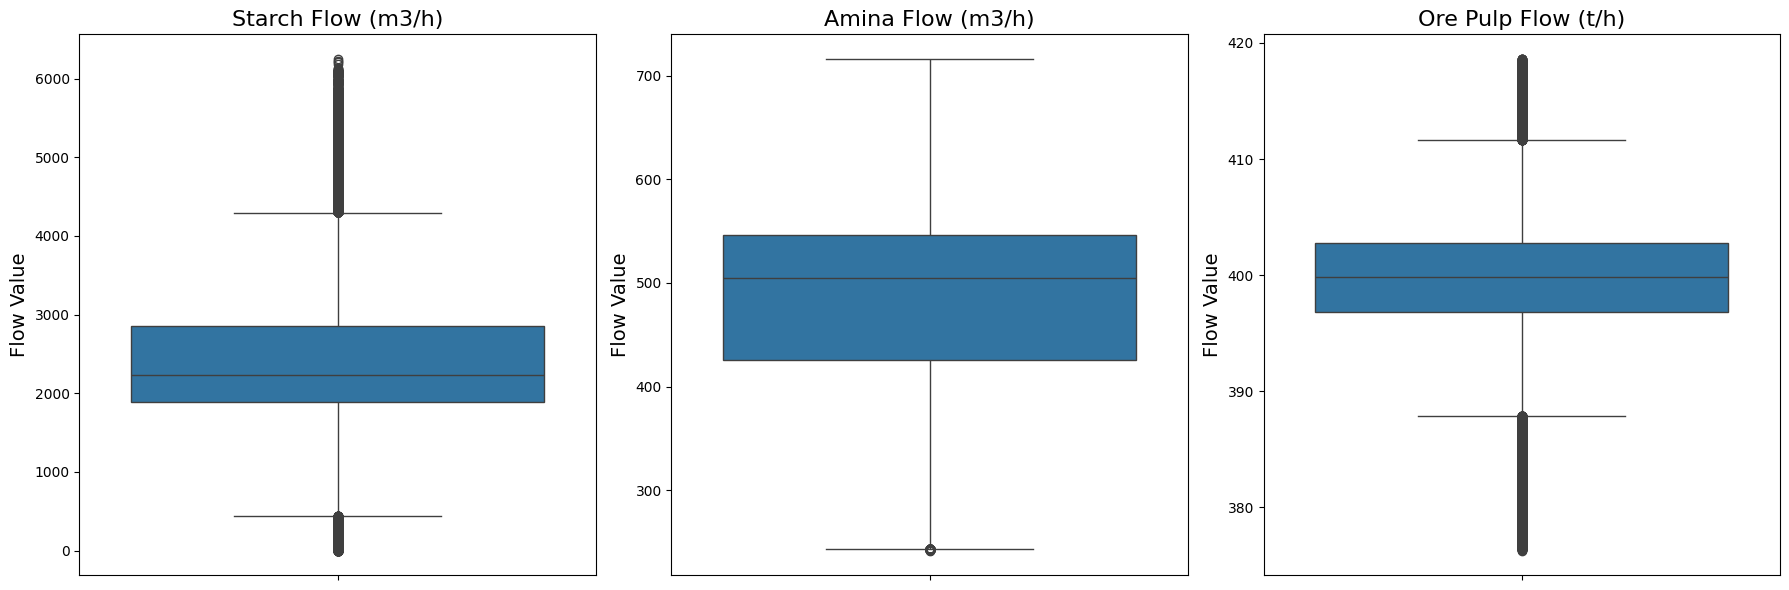

In [18]:
# Next, we'll do a box plot to visualise the distrubiton for - Starch Flow, Amina Flow, Ore Pulp Flow

# Start by setting up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Three plots side by side

# Create separate box plots
sns.boxplot(ax=axes[0], y='Starch Flow', data=df2)
axes[0].set_title('Starch Flow (m3/h)', fontsize=16)
axes[0].set_ylabel('Flow Value', fontsize=14)

sns.boxplot(ax=axes[1], y='Amina Flow', data=df2)
axes[1].set_title('Amina Flow (m3/h)', fontsize=16)
axes[1].set_ylabel('Flow Value', fontsize=14)

sns.boxplot(ax=axes[2], y='Ore Pulp Flow', data=df2)
axes[2].set_title('Ore Pulp Flow (t/h)', fontsize=16)
axes[2].set_ylabel('Flow Value', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Insights:**

* Starch Flow -- mean around 3000 m3/h a much wider volume of Flow Value, and a wider range. More outliers on the upper end.
* Amina Flow -- few outliers, mean around 500 m3/h
* Ore Pulp Flow -- mean around 400 t/h. More outliers present on the figure, but considering the scale of the unit of measurement, it does not seem to indicate a significant amount of volatility.


Nothing unusual about the datapoints here.

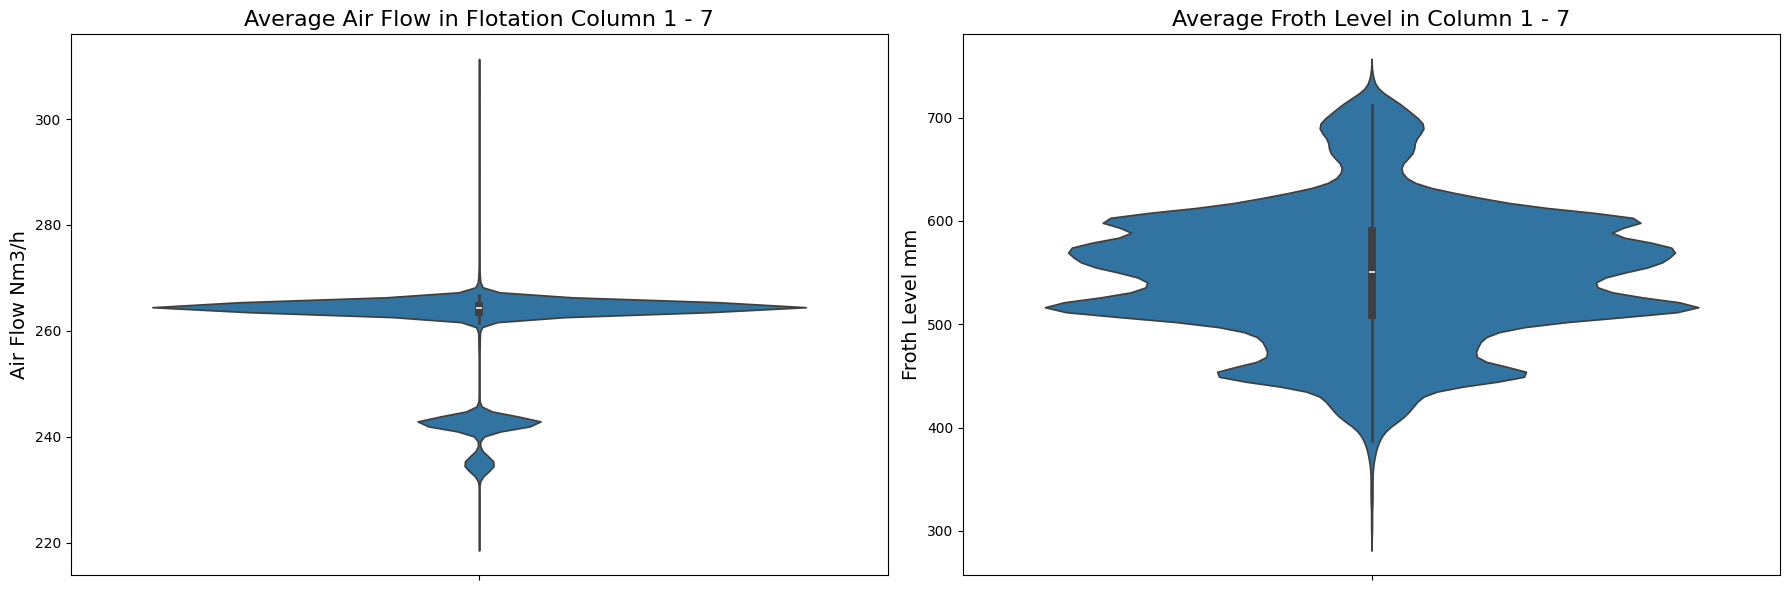

In [19]:
# Now let's investigate the rest of the factors

# Violin plot - Average Air Flow, Average Froth Level

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))  # Two plots side by side

# Create separate violin plots
sns.violinplot(ax=axes[0], y='Average Air Flow', data=df2)
axes[0].set_title('Average Air Flow in Flotation Column 1 - 7', fontsize=16)
axes[0].set_ylabel('Air Flow Nm3/h', fontsize=14)

sns.violinplot(ax=axes[1], y='Average Froth Level', data=df2)
axes[1].set_title('Average Froth Level in Column 1 - 7', fontsize=16)
axes[1].set_ylabel('Froth Level mm', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Insights:**



*   Air Flow fluctuates, range between 210 - 330 Nm3/h
*   Average Froth Level has a more even distribution, ranging between 400 - 710 mm.

# 3. Bivariate Analysis

Now, let's investigate our variables to understand their relationship to each other, testing to see how the inputs affect the % Iron or Silica Concentrates in the output.

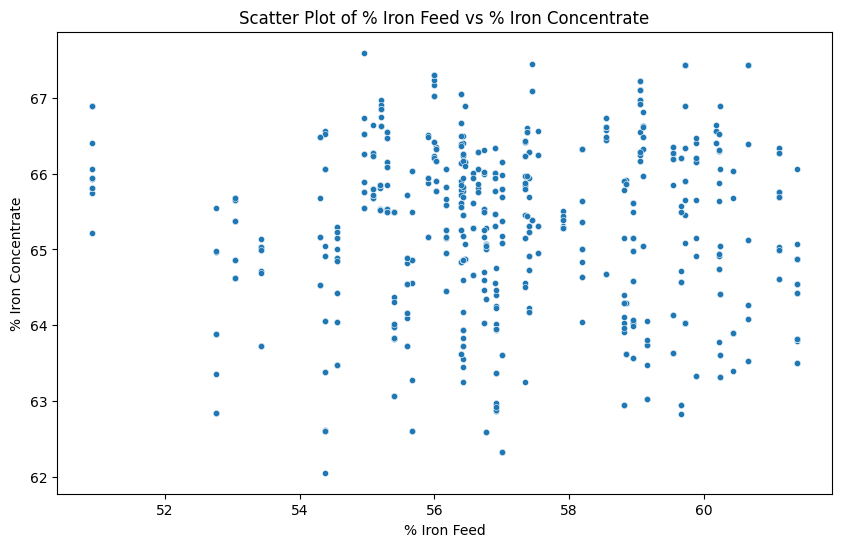

Correlation coefficient: -0.05770872519874328


In [20]:
# Bivariate analysis

# First, let's check the relationship between % Iron Feed in the input and the % Iron Concentrate in the output Scatterplots (regplot)

plt.figure(figsize=(10, 6))

df_sc = df2.sample(n=1000, random_state=42)


sns.scatterplot(x='% Iron Feed', y='% Iron Concentrate', data=df_sc, s=20)
plt.title('Scatter Plot of % Iron Feed vs % Iron Concentrate')
plt.xlabel('% Iron Feed')
plt.ylabel('% Iron Concentrate')
plt.show()

correlation = df2['% Iron Feed'].corr(df2['% Iron Concentrate'])
print(f'Correlation coefficient: {correlation}')


**Insights:**

There is a very slight positive correlation between % Iron Feed and % Iron Concentrate in the output. This isn't surprising, as more Iron in the feed should result in more Iron in the concentrate.

How about correlations between other variables and the % Silica Concentrate?

<Figure size 1000x600 with 0 Axes>

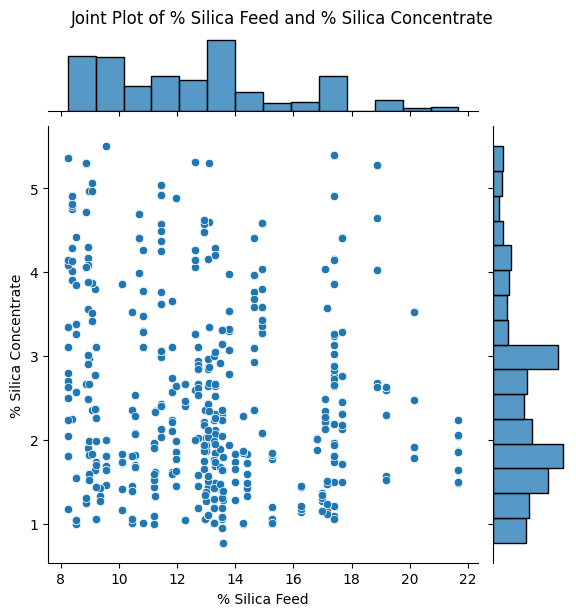

Correlation coefficient: -0.15780294250461635


In [21]:
# Finding correlations between Silica Feed & Silica Concentrate
plt.figure(figsize=(10, 6))
sns.jointplot(x='% Silica Feed', y='% Silica Concentrate', data=df_sc, kind='scatter')
plt.suptitle('Joint Plot of % Silica Feed and % Silica Concentrate', y=1.02)
plt.show()

correlation2 = df2['% Silica Feed'].corr(df2['% Silica Concentrate'])
print(f'Correlation coefficient: {correlation2}')

**Insights:**

Again, nothing unusual. A higher % of Silica in input results in slightly higher % of Silica in the output.

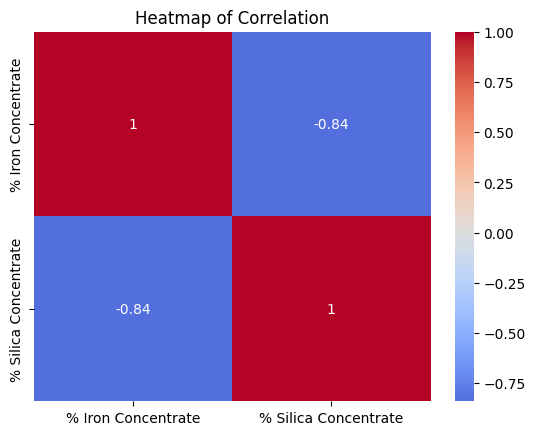

In [22]:
# Investigate Iron Concentrate and Silica Concentrate together
# Heatmap between % Iron Concentrate and % Silica Concentrate

correlation_matrix = df2[['% Iron Concentrate', '% Silica Concentrate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation')
plt.show()

It only makes sense to see that the higher the % of Iron in the output, the less the % of Silica, and vice versa. Let's move on to the next analysis.

# 4. Multivariate Analysis

A multivariate analysis will give us a good overview of the relationships between all variables.

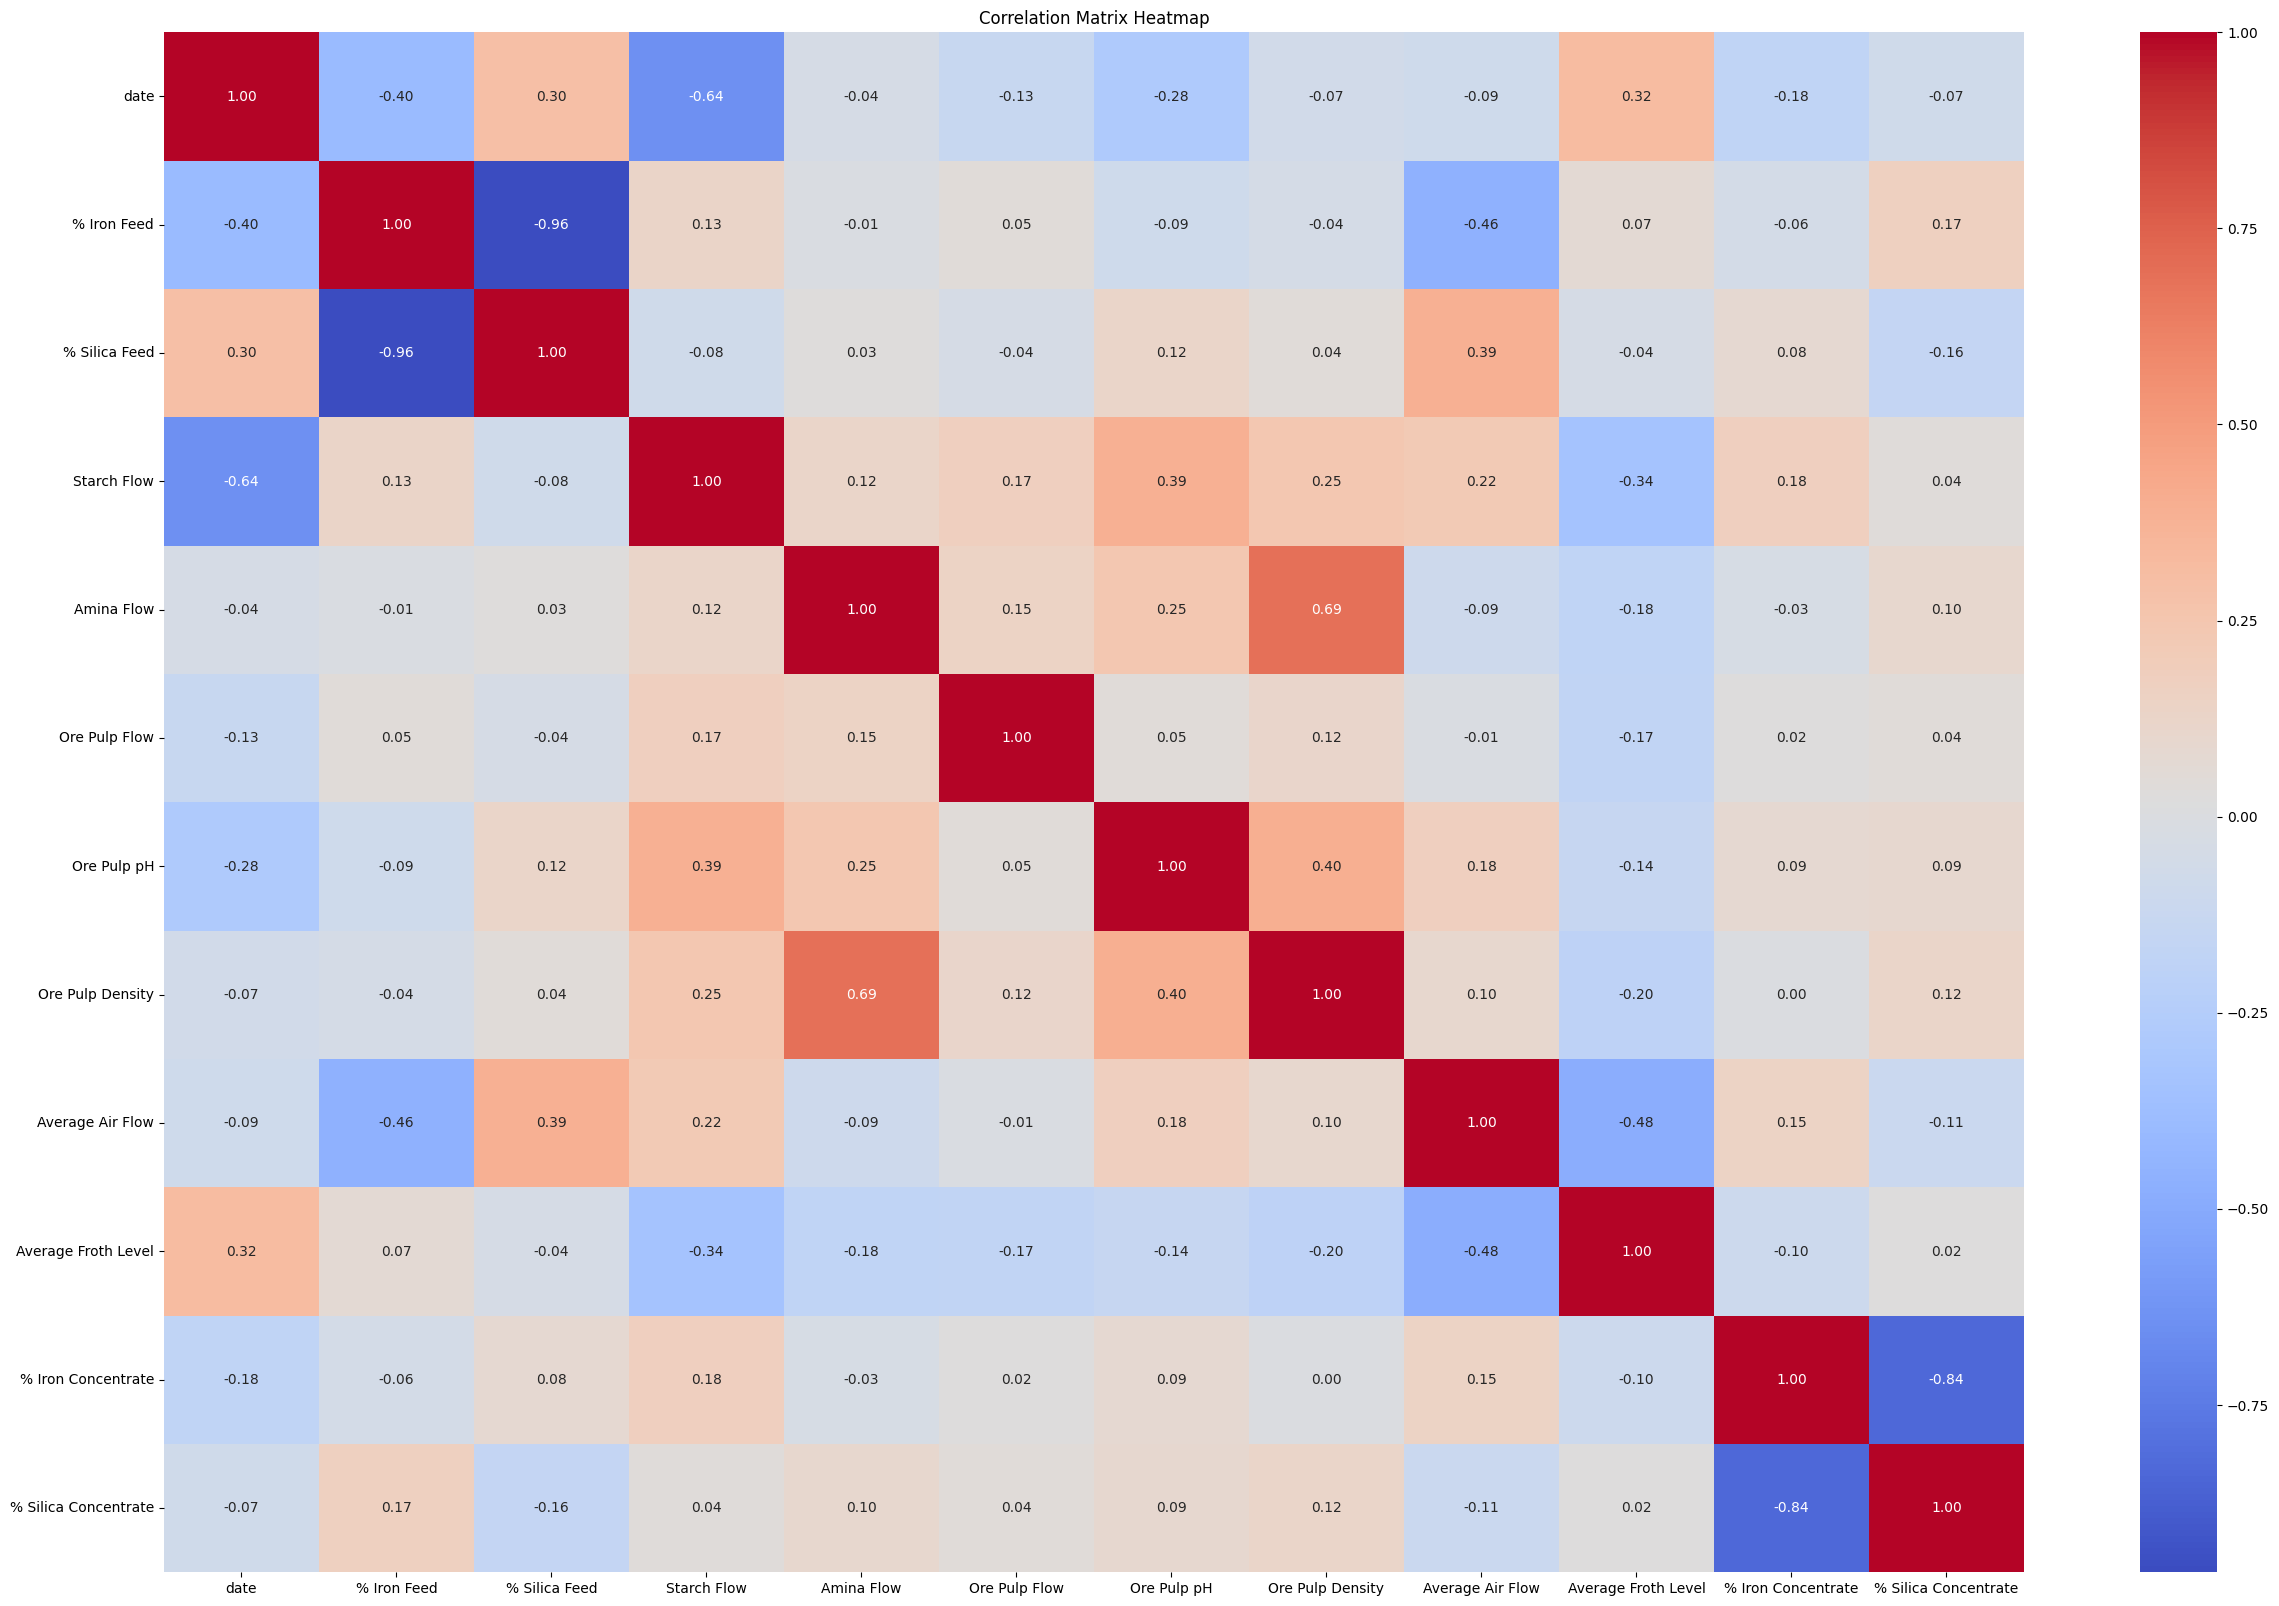

In [23]:
#Start with an overview of correlation between all variables

corr_matrix = df2.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Insights:**

We can see some great insights here -- of all variables:

- The strongest positive correlation lies between the Ore Pulp Density and Amina Flow while the strongest negative correlation lies between % Iron Concentrate and % Silica Concentrate.
- Amina Flow, Ore Pulp pH, and Air Flow have the highest correlations with % Silica  Concentrate (excluding % Iron Concentrate).




<Figure size 1200x1000 with 0 Axes>

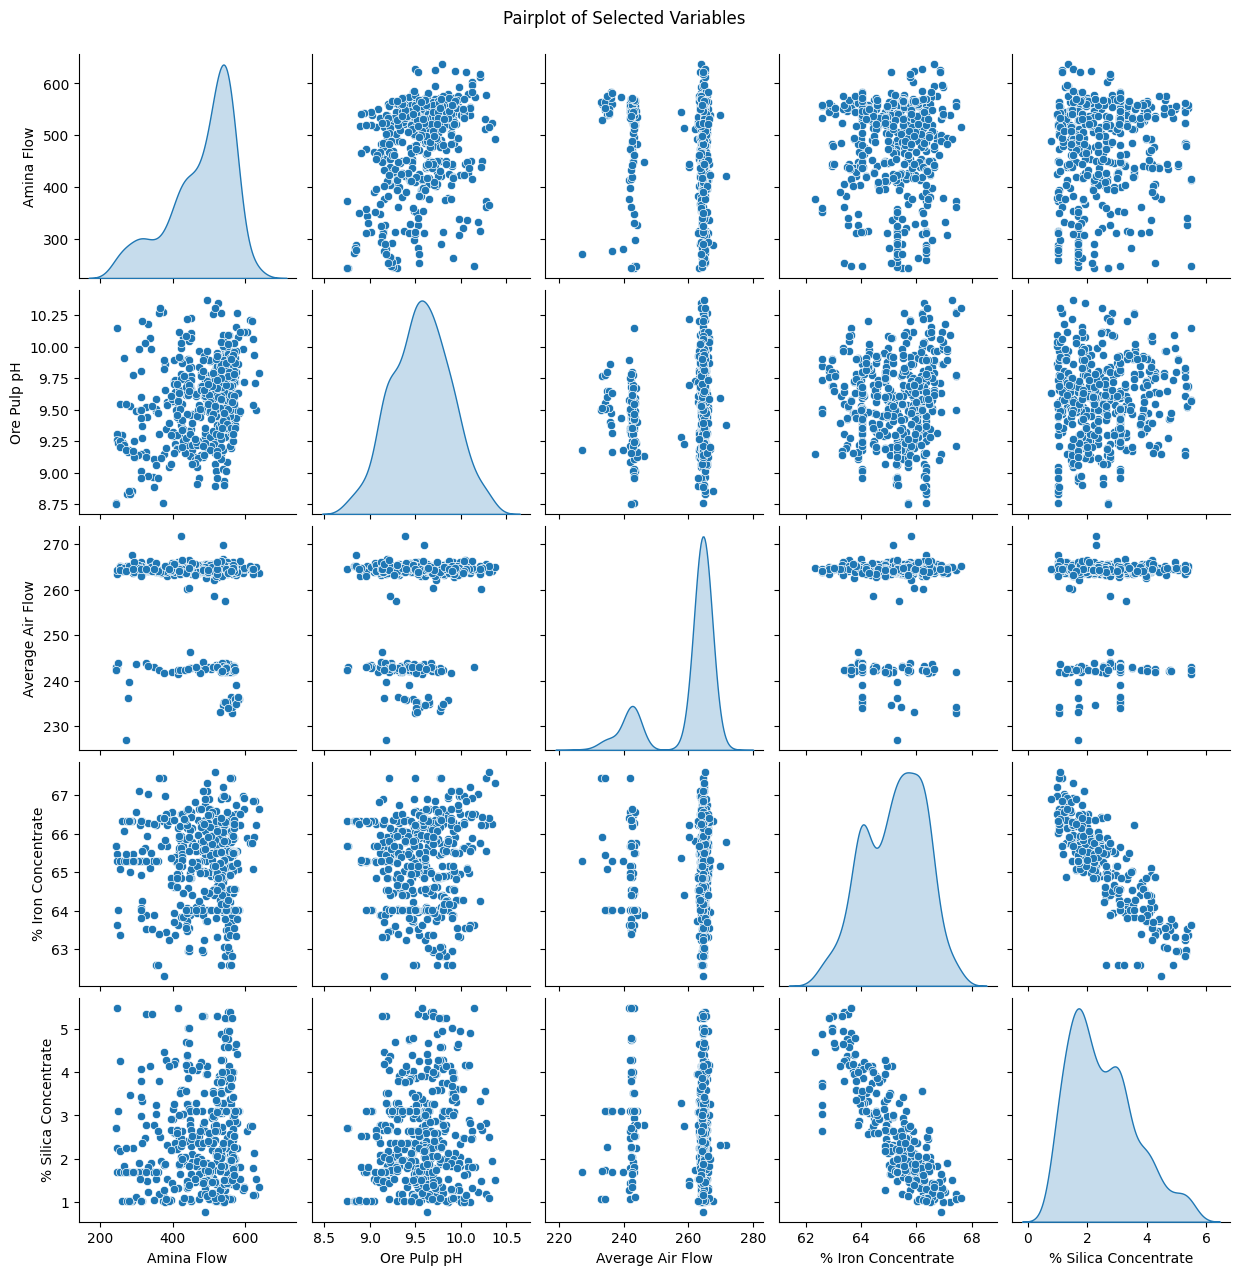

In [24]:
# Now, let's take a closer look at these variables of interest with a Pairplot analysis

# Set up the variables we want
pp_variables = [
    'Amina Flow','Ore Pulp pH', 'Average Air Flow',
    '% Iron Concentrate', '% Silica Concentrate'
]

# Pull them from our dataframe
df_plot = df2[pp_variables]

# Knowing that we have over 700k+ datapoints, we'll randomly sample 500 from our selected columns to keep the figures uncluttered
df_pltsam = df_plot.sample(n=500, random_state=42)
plt.figure(figsize=(12, 10))
sns.pairplot(df_pltsam, diag_kind='kde')
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()


In [28]:
#Let's deploy some machine learning techniques to see if we can predict % Silica Concentrate there

# Importing relevant libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

data = df2.copy() # Use a copy to avoid SettingWithCopyWarning

# Defining threshold for high silica concentration
threshold = 5.0
data['High Silica'] = (data['% Silica Concentrate'] > threshold).astype(int)

# Stratified sampling
sample_size = 100000

# Ensure sample_size does not exceed the total number of rows in 'data'
actual_sample_size = min(sample_size, len(data))

# Perform stratified sampling
if actual_sample_size == len(data):
    df_sample = data.copy() # If actual_sample_size is all data, just use it
elif len(data['High Silica'].unique()) > 1:
    # Use train_size to specify the number of samples in the returned stratified sample
    df_sample, _ = train_test_split(data, train_size=actual_sample_size, stratify=data['High Silica'], random_state=42)
else:
    # If only one class is present, stratified sampling is not needed/possible
    df_sample = data.sample(n=actual_sample_size, random_state=42)

# Prepare features and target variable
features = ['% Silica Feed', 'Amina Flow', 'Ore Pulp pH', 'Average Air Flow']
X = df_sample[features]
y = df_sample['High Silica']

# Split the sampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
print("Feature Importances:")
print(feature_importance.sort_values(by='Importance', ascending=False))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18242
           1       0.89      0.86      0.87       446

    accuracy                           0.99     18688
   macro avg       0.94      0.93      0.93     18688
weighted avg       0.99      0.99      0.99     18688

Confusion Matrix:
[[18193    49]
 [   64   382]]
Feature Importances:
            Feature  Importance
2       Ore Pulp pH    0.324924
1        Amina Flow    0.302038
0     % Silica Feed    0.260751
3  Average Air Flow    0.112287


Interpretation:  

*   Model has a precision of 99% for predicting low-silica cases. However, given the relative abundance of low-silica datapoints to high-silica datapoints, this is not significant.

*   The recall for high silica cases (defined as % Silica Concentrate > 5%) is 50%, meaning the model correctly identifies half of the actual high silica instances.

* The F1 score for Class 1 (high-silica cases) is 0.63, reflecting a balance between precision and recall. While the model captures some high silica cases, it also misclassifies a considerable number.

* Ore Pulp pH (29.98%) is the most important feature, followed closely by Amina Flow (27.32%), indicating these factors significantly influence predictions. The relatively high feature importance of % Silica Feed and Average Air flow also show that there could be a complex interplay of many variables that shape Silica predications.

# 5. Conclusion & Next Steps


We have completed our EDA of the Iron Ore quality dataset.

Overall, we found that Ore Pulp pH and Amina Flow are the variables that most influence the prediction of silica impurity concentration in the output flow.

For the next steps, we can consider:

1. Continue collecting data from the flotation column to create more data points on high-silica cases from which we can extract insights from.
2. Oversample high-silica cases with the current dataset to further fine-tune our analysis and improve our predictions.
3. Conducting controlled experiments, manipulating Ore Pulp pH and Amina Flow in an isolated setting to investigate relationship between the variables and silica concentration on a chemical basis.

